In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt


In [35]:
prat_df = pd.read_csv('arturo_prat_qc.csv', parse_dates=["# observation_time"], index_col="# observation_time")
prat_df.head()

,latitude,longitude,air_temperature (degC),dew_point_temperature (degC),wind_direction (deg),wind_speed (m/s),sea_level_pressure (hPa),station_pressure (hPa),relative_humidity (%),low_cloud_area_fraction (code),low_cloud_type (code),middle_cloud_type (code),high_cloud_type (code),visibility (code)
# observation_time,,,,,,,,,,,,,,
1983-01-01 00:00:00,-62.5,-59.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-01-01 03:00:00,-62.5,-59.7,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-01-01 06:00:00,-62.5,-59.7,0.6,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-01-01 09:00:00,-62.5,-59.7,0.8,NaN,0.0,0.0,990.7,990.1,NaN,NaN,NaN,NaN,NaN,NaN
1983-01-01 12:00:00,-62.5,-59.7,1.0,NaN,0.0,0.0,991.6,991.0,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
prat_df.dropna(axis=1, how='all', inplace=True)

In [37]:
prat_df.drop(columns=['longitude', 'latitude'], inplace=True)

In [38]:
prat_df = prat_df.fillna(0)

In [39]:
prat_daily = prat_df.resample('D').mean()

In [40]:
prat_daily.shape

(7670, 5)

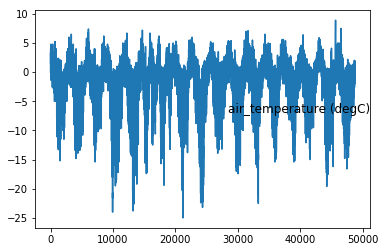

In [41]:
from matplotlib import pyplot
values = prat_df.values
# specify columns to plot
groups = [0]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(prat_df.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [42]:
prat_daily.corr()

,air_temperature (degC),wind_direction (deg),wind_speed (m/s),sea_level_pressure (hPa),station_pressure (hPa)
air_temperature (degC),1.000000,0.269341,-0.289440,-0.038992,-0.051665
wind_direction (deg),0.269341,1.000000,0.122739,0.011874,0.096636
wind_speed (m/s),-0.289440,0.122739,1.000000,0.002021,0.006538
sea_level_pressure (hPa),-0.038992,0.011874,0.002021,1.000000,0.356386
station_pressure (hPa),-0.051665,0.096636,0.006538,0.356386,1.000000


In [75]:
sam = pd.read_excel('sam_sample_month.xlsx', parse_dates=True, index_col='date')

In [76]:
sam.head()

,temp
date,
1983-01-01,-2.44
1983-02-01,0.89
1983-03-01,-0.71
1983-04-01,-0.60
1983-05-01,-0.68


In [77]:
sam.index

DatetimeIndex(['1983-01-01', '1983-02-01', '1983-03-01', '1983-04-01',
               '1983-05-01', '1983-06-01', '1983-07-01', '1983-08-01',
               '1983-09-01', '1983-10-01',
               ...
               '2003-03-01', '2003-04-01', '2003-05-01', '2003-06-01',
               '2003-07-01', '2003-08-01', '2003-09-01', '2003-10-01',
               '2003-11-01', '2003-12-01'],
              dtype='datetime64[ns]', name='date', length=252, freq=None)

In [80]:
sam_daily = sam.resample('D').ffill()

In [81]:
result = pd.concat([prat_daily.reset_index(drop=True), sam_daily.reset_index(drop=True)], axis=1)

In [82]:
result.head()

,air_temperature (degC),wind_direction (deg),wind_speed (m/s),sea_level_pressure (hPa),station_pressure (hPa),temp
0,1.1625,0.00,0.0000,620.8000,620.425,-2.44
1,1.9625,0.00,0.0000,998.1625,997.550,-2.44
2,2.3875,143.75,1.5125,1006.0500,1005.425,-2.44
3,2.4000,152.50,5.4125,996.7500,996.150,-2.44
4,1.7625,242.50,11.0625,986.3500,985.750,-2.44


In [84]:
result.drop(columns=['station_pressure (hPa)'], inplace=True)

In [85]:
y = result['air_temperature (degC)']
y = y.fillna(0)
y= y.values


In [115]:
X = result.drop(columns=['air_temperature (degC)'], axis=1)
X=X.fillna(0)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pipeline = Pipeline([
    ('scaling', StandardScaler()),
])

X = pipeline.fit_transform(X)
X

array([[-1.59185883, -1.2331203 , -0.66843163, -1.45353803],
       [-1.59185883, -1.2331203 ,  0.43655475, -1.45353803],
       [-0.00782716, -0.86975082,  0.45965079, -1.45353803],
       ...,
       [-0.10424648,  0.36450419,  0.45104926, -0.08320082],
       [ 0.77730158, -0.48535996,  0.46675164, -0.08320082],
       [ 1.31449493, -0.38325614,  0.44354579, -0.08320082]])

In [116]:
from sklearn.model_selection import train_test_split  

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  

In [118]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
reg_prediction = regressor.predict(X_test)


In [119]:
from sklearn.metrics import mean_squared_error
reg_mse = (y_test, reg_prediction )
reg_rmse = np.sqrt(reg_mse)
#print("the rmse: %s" % reg_rmse)
# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error  
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))  
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, reg_prediction))  
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, reg_prediction)) 

The Explained Variance: 0.22
The Mean Absolute Error: 2.43 degrees celsius
The Median Absolute Error: 1.80 degrees celsius


C:\Users\abhik\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


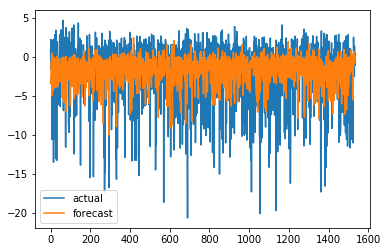

In [120]:
plt.plot(y_test, label='actual')
plt.plot(prediction, label='forecast')
plt.legend()
plt.show()

In [121]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=10)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=10, splitter='best')

In [122]:
prediction_tree = tree_reg.predict(X_test)
res = y_test - prediction
# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error  
print("The Explained Variance: %.2f" % tree_reg.score(X_test, y_test))  
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, prediction_tree))  
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, prediction_tree))  

The Explained Variance: -0.19
The Mean Absolute Error: 2.86 degrees celsius
The Median Absolute Error: 1.73 degrees celsius


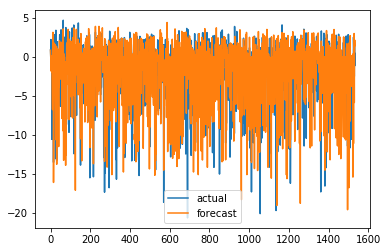

In [123]:
plt.plot(y_test, label='actual')

plt.plot(prediction_tree, label='forecast')
plt.legend()
plt.show()

In [124]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
svm_predictions = svm_reg.predict(X_test)

In [125]:
print("The Explained Variance: %.2f" % svm_reg.score(X_test, y_test))  

print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, svm_predictions))  
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, svm_predictions))

The Explained Variance: 0.15
The Mean Absolute Error: 2.42 degrees celsius
The Median Absolute Error: 1.64 degrees celsius


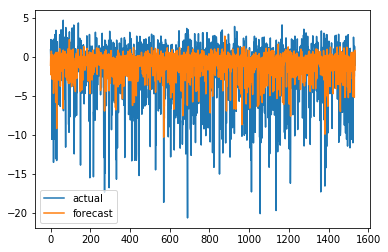

In [126]:
plt.plot(y_test, label='actual')
plt.plot(svm_predictions, label='forecast')
plt.legend()
plt.show()


In [127]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [128]:
rf_predictions = forest_reg.predict(X_test)
print("The Explained Variance: %.2f" % forest_reg.score(X_test, y_test))  

print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, rf_predictions))  
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, rf_predictions))

The Explained Variance: 0.26
The Mean Absolute Error: 2.32 degrees celsius
The Median Absolute Error: 1.61 degrees celsius


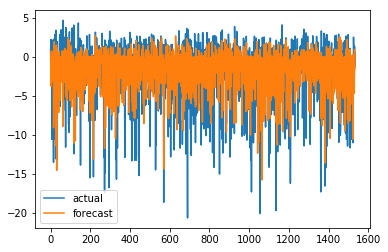

In [129]:
plt.plot(y_test, label='actual')
plt.plot(rf_predictions, label='forecast')
plt.legend()
plt.show()
